In [1]:
#import the data frame
import pandas as pd

In [2]:
df_wout_outliers = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Data_Set_WOut_Outliers.csv')

In [3]:
df_wout_outliers.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
       'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
       'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
       'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
       'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
       'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
       'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
       

In [4]:
X = df_wout_outliers.drop(columns=['length_of_stay', 'length_of_stay_hours'])

In [5]:
y = df_wout_outliers['length_of_stay_hours']

In [6]:
X

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287028,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
287029,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
287030,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
287031,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y

0          18.866667
1          24.366667
2          42.100000
3          53.333333
4         108.933333
             ...    
287028    132.733333
287029    240.266667
287030    167.916667
287031     83.800000
287032    207.316667
Name: length_of_stay_hours, Length: 287033, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.score(X_test, y_test)

0.2243105679627404

In [14]:
lr.score(X_train, y_train)

0.2236049396482055

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
y_pred = lr.predict(X_test)

In [17]:
mean_absolute_error(y_test, y_pred)

64.38067331300869

In [18]:
mean_squared_error(y_test, y_pred)

8552.117021660917

In [19]:
r2_score(y_test, y_pred)

0.2243105679627404

In [20]:
lr.coef_

array([ 7.50213828e-09,  4.18765507e-09, -2.14134083e-01,  3.68180220e+01,
        1.76958185e+01, -8.98033098e-01, -3.26194815e+00,  1.04237221e+01,
       -3.37379043e+00,  3.91814762e+00, -3.96237160e+00,  1.86863441e+00,
       -6.72305507e+00, -5.04693084e+00,  5.13042817e-01, -1.27350557e+01,
       -1.66300375e+01, -1.42422534e+01,  2.12207680e+00, -3.09058040e+00,
       -1.17243557e+00, -1.13899349e+01,  1.22577890e+01, -7.55578921e+00,
       -4.77807861e+00, -1.28883806e+01, -1.95295844e+01, -1.37549979e+00,
        5.28215370e-01, -5.50869930e+00,  2.29292315e+00, -8.91857736e+00,
        2.51254262e+00, -2.33267630e+00,  3.48439844e+00, -1.04290984e+01,
        2.45881378e+00, -1.07241197e+01, -5.82660835e+00, -1.99773492e+00,
       -4.97707290e+00, -6.20584523e+00, -4.89858809e-01, -9.52420809e+00,
        5.92356128e+01, -8.04714624e+00,  4.96595507e+01, -1.62343103e+00,
        4.60274496e+01,  5.24735154e+01,  4.62524399e+01,  4.19566420e+01,
       -7.55447235e+00, -

In [21]:
lr.intercept_

-19.15850455780145

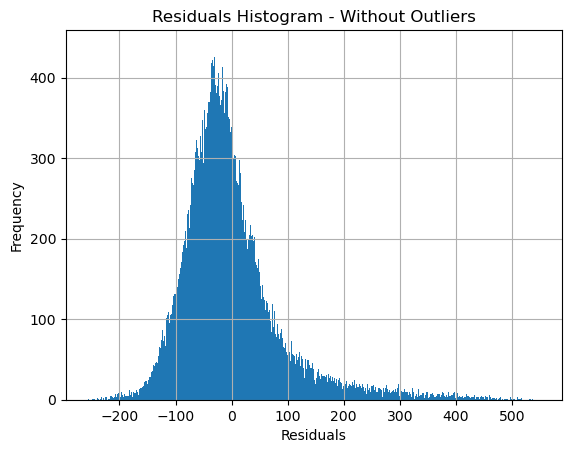

In [23]:
import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.hist(residuals, bins=800)  # Adjust the number of bins as needed
plt.title('Residuals Histogram - Without Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()